# Introduction

This a personal project created by [Alexander Quesada Quesada](https://www.linkedin.com/in/alexander-quesada-quesada-b91348259/), the goal is to simulate Linkedin job postings as nodes in a graph and create edges between nodes that satisfy specific requierments, those connections represent similarity between two jobs, and they will also have weights from 0 to 1 representing the strength of that similarity.

**This project includes two different types of Deep Learning Models:**

* GNN (Graph Neural Network) model that predicts new connections between nodes after a cautious and meticulous training process where it learns the patterns of the pre-established edges to come up with new ones.

* XGBoost model that applies regression learning to predict  weights (strength) for all the previously predicted
new connections between nodes.

**The workflow of this project consists on:**  

1. Loading and Merging the CSV different files into pandas datasets.

2. Cleaning, encoding and polishing further details of the merged pandas dataset.

3. Preparing the data as matrices that PyTorch Geometric library can understand and convert into [PyTorch Geometric Graph Data](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html).

4. Plotting some examples of the PyTorch Geometric Graph Data

5. Preparing both Training and Testing Data.

6. [Model Creation (by Orbifold)](https://github.com/Orbifold/pyg-link-prediction/blob/main/run.py#L22), batching, training and evaluating GNN model's performance.

7. Creating and Training the XGBoost model.

8. Create the final function that predicts all possible new connections and their corresponding weights for all nodes within some input graph, by using the previous mentioned models.

9. Unit Testing the combined Deep Learning Pipeline's predictions and perfomance.

10. Use [GNNLens2](https://github.com/dmlc/GNNLens2) for graph visualization, with the Deep Learning Pipeline's results included.

11. Public Repository Creating and Web Deployment of this App.

12. Models Pipeline Overview by Visualization [(README)](https://github.com/papitaAlgodonCplusplus/Linkedin-Graph-Neural-Networks-Project/blob/main/README.md)

# Dataset and Files

---

[This dataset](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings) comprises over 33,000 job postings gathered from LinkedIn over two separate days, offering a comprehensive snapshot of job opportunities. Each posting includes 27 attributes such as title, job description, salary, location, application URL, and work type (remote, contract, etc). Additional files contain information on benefits, skills, and industries associated with each posting. The dataset also links jobs to companies, with a separate CSV file providing details on each company, including description, headquarters location, number of employees, and follower count.

---

### job_postings.csv

- `job_id`: The job ID as defined by [LinkedIn](https://www.linkedin.com/jobs/view/job_id).
- `company_id`: Identifier for the company associated with the job posting (maps to companies.csv).
- `title`: Job title.
- `description`: Job description.
- `max_salary`: Maximum salary.
- `med_salary`: Median salary.
- `min_salary`: Minimum salary.
- `pay_period`: Pay period for salary (Hourly, Monthly, Yearly).
- `formatted_work_type`: Type of work (Fulltime, Parttime, Contract).
- `location`: Job location.
- `applies`: Number of applications that have been submitted.
- `original_listed_time`: Original time the job was listed.
- `remote_allowed`: Whether the job permits remote work.
- `views`: Number of times the job posting has been viewed.
- `job_posting_url`: URL to the job posting on a platform.
- `application_url`: URL where applications can be submitted.
- `application_type`: Type of application process (offsite, complex/simple onsite).
- `expiry`: Expiration date or time for the job listing.
- `closed_time`: Time to close job listing.
- `formatted_experience_level`: Job experience level (entry, associate, executive, etc).
- `skills_desc`: Description detailing required skills for the job.
- `listed_time`: Time when the job was listed.
- `posting_domain`: Domain of the website with the application.
- `sponsored`: Whether the job listing is sponsored or promoted.
- `work_type`: Type of work associated with the job.
- `currency`: Currency in which the salary is provided.
- `compensation_type`: Type of compensation for the job.
‎

### job_details/benefits.csv

- `job_id`: The job ID.
- `type`: Type of benefit provided (401K, Medical Insurance, etc).
- `inferred`: Whether the benefit was explicitly tagged or inferred through text by LinkedIn.

### company_details/companies.csv

- `company_id`: The company ID as defined by LinkedIn.
- `name`: Company name.
- `description`: Company description.
- `company_size`: Company grouping based on the number of employees (0 Smallest - 7 Largest).
- `country`: Country of the company headquarters.
- `state`: State of the company headquarters.
- `city`: City of the company headquarters.
- `zip_code`: ZIP code of the company's headquarters.
- `address`: Address of the company's headquarters.
- `url`: Link to the company's LinkedIn page.

### company_details/employee_counts.csv

- `company_id`: The company ID.
- `employee_count`: Number of employees at the company.
- `follower_count`: Number of company followers on LinkedIn.
- `time_recorded`: Unix time of data collection.

---

*CC BY-SA 4.0*

*By ARSH KON*

---

# Load -> Transform -> Merge

## Job Postings CSV

In [1]:
import pandas as pd
import csv
df = pd.read_csv("https://git.ucr.ac.cr/ALEXANDER.QUESADAQUESADA/misc/-/raw/main/job_postings.csv?ref_type=heads", on_bad_lines='skip')

In [2]:
df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [3]:
# Keep columns that have at least 50% of non NaN data
df.dropna(axis=1, thresh=int(15886*0.5), inplace=True)
df

,job_id,company_id,title,description,formatted_work_type,location,applies,original_listed_time,views,job_posting_url,application_url,application_type,expiry,formatted_experience_level,listed_time,posting_domain,sponsored,work_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",NaN,1.690000e+12,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,1.690000e+12,NaN,1,FULL_TIME
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",NaN,1.690000e+12,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,1.690000e+12,NaN,0,FULL_TIME
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1.0,1.690000e+12,17.0,https://www.linkedin.com/jobs/view/133196985/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,1.690000e+12,NaN,0,CONTRACT
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",NaN,1.690000e+12,NaN,https://www.linkedin.com/jobs/view/381055942/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,1.690000e+12,NaN,0,FULL_TIME
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",NaN,1.690000e+12,2.0,https://www.linkedin.com/jobs/view/529257371/?...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,1.690000e+12,NaN,1,FULL_TIME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",NaN,1.690000e+12,1.0,https://www.linkedin.com/jobs/view/3701373516/...,https://aspirebakeriescareers.com/job/West-Col...,OffsiteApply,1.700000e+12,Entry level,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2.0,1.690000e+12,7.0,https://www.linkedin.com/jobs/view/3701373522/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,Entry level,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",NaN,1.690000e+12,3.0,https://www.linkedin.com/jobs/view/3701373523/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,Entry level,1.690000e+12,recruiting.ultipro.com,0,PART_TIME
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",NaN,1.690000e+12,10.0,https://www.linkedin.com/jobs/view/3701373524/...,https://opportunities.columbia.edu/jobs/mri-ma...,OffsiteApply,1.700000e+12,Mid-Senior level,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME


In [4]:
# Fill nan applies as 0
df['applies'].fillna(value=0, inplace=True)
df['applies'] = df['applies'].astype(int)

# Drop useless columns
df.drop(columns='original_listed_time', inplace=True)
df.drop(columns='job_posting_url', inplace=True)
df.drop(columns='application_url', inplace=True)
df.drop(columns='expiry', inplace=True)
df.drop(columns='listed_time', inplace=True)
df.drop(columns='work_type', inplace=True)
df

,job_id,company_id,title,description,formatted_work_type,location,applies,views,application_type,formatted_experience_level,posting_domain,sponsored
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,NaN,1
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,NaN,ComplexOnsiteApply,NaN,NaN,0
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17.0,ComplexOnsiteApply,NaN,NaN,0
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,NaN,ComplexOnsiteApply,NaN,NaN,0
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2.0,ComplexOnsiteApply,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",0,1.0,OffsiteApply,Entry level,aspirebakeriescareers.com,0
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2,7.0,OffsiteApply,Entry level,recruiting.ultipro.com,0
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",0,3.0,OffsiteApply,Entry level,recruiting.ultipro.com,0
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",0,10.0,OffsiteApply,Mid-Senior level,opportunities.columbia.edu,0


## Companies CSV

In [5]:
df2 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/companies.csv", on_bad_lines='skip')
df2

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
6058,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
6060,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
6061,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


In [6]:
df = df.merge(df2, on='company_id', how='left')
df.rename(columns = {'description_x':'job_desc'}, inplace = True)
df.rename(columns = {'description_y':'company_desc'}, inplace = True)
df.rename(columns = {'name':'company_name'}, inplace = True)
df.rename(columns = {'state':'company_state'}, inplace = True)
df.rename(columns = {'country':'company_country'}, inplace = True)
df.rename(columns = {'city':'company_city'}, inplace = True)
df.rename(columns = {'zip_code':'company_zip_code'}, inplace = True)
df.rename(columns = {'address':'company_address'}, inplace = True)
df.drop(columns='url', inplace=True)
del df2
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,posting_domain,sponsored,company_name,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,NaN,ComplexOnsiteApply,NaN,NaN,0,CargoLogin.,CargoLogin is a freight and logistics company ...,1.0,California,US,Santa Clarita,28358,Constellation Rd
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17.0,ComplexOnsiteApply,NaN,NaN,0,Employvision Inc.,Employvision is a talent acquisition and manag...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,NaN,ComplexOnsiteApply,NaN,NaN,0,First Baptist Church Forney,NaN,2.0,Texas,US,Forney,75126,1003 College St
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2.0,ComplexOnsiteApply,NaN,NaN,1,Ken Fulk Inc,"Ken Fulk Inc, is a creative think tank based o...",1.0,California,US,San Francisco,94103,310 Seventh Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",0,1.0,OffsiteApply,Entry level,aspirebakeriescareers.com,0,Aspire Bakeries,Aspire Bakeries is a North American baking com...,5.0,California,US,Los Angeles,90045,6601 Center Dr W
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2,7.0,OffsiteApply,Entry level,recruiting.ultipro.com,0,Holy Name Medical Center,"Holy Name is a fully accredited, not-for-profi...",5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",0,3.0,OffsiteApply,Entry level,recruiting.ultipro.com,0,Holy Name Medical Center,"Holy Name is a fully accredited, not-for-profi...",5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",0,10.0,OffsiteApply,Mid-Senior level,opportunities.columbia.edu,0,Columbia University Irving Medical Center,Columbia University Irving Medical Center (CUI...,7.0,New York,US,New York,0,630 West 168th St.


## Benefits CSV

In [7]:
df3 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/benefits.csv", on_bad_lines='skip')
df3

,job_id,inferred,type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance
...,...,...,...
13756,3701373527,0,Medical insurance
13757,3701373527,0,Vision insurance
13758,3701373527,0,Dental insurance
13759,3701373527,0,401(k)


In [8]:
df = df.merge(df3, on='job_id', how='left')
df.rename(columns = {'type':'job_benefit'}, inplace = True)
df.drop(columns='inferred', inplace=True)
del df3
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,sponsored,company_name,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401(k)
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid maternity leave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24146,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Medical insurance
24147,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Vision insurance
24148,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance
24149,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k)


## Skills CSV

In [9]:
df4 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/job_skills.csv", on_bad_lines='skip')
df4

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT
...,...,...
27894,3701373522,ADM
27895,3701373523,HCPR
27896,3701373524,OTHR
27897,3701373527,BD


In [10]:
df = df.merge(df4, on='job_id', how='left')
df.rename(columns = {'skill_abr':'job_skill_type'}, inplace = True)
del df4
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_name,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,SALE
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,BD
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,SALE
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,BD
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance,SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42601,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE
42602,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD
42603,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE
42604,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD


## Companies roles

In [11]:
df5 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/company_specialities.csv", on_bad_lines='skip')
df5 = df5.groupby('company_id')['speciality'].agg(', '.join).reset_index()
df5

,company_id,speciality
0,1009,"Cloud, Mobile, Cognitive, Security, Research, ..."
1,1016,"Healthcare, Biotechnology, Healthcare, Biotech..."
2,1021,"Distributed Power, Gasification, Generators, H..."
3,1028,"enterprise, software, applications, database, ..."
4,1038,"Audit, Consulting, Financial Advisory, Risk Ma..."
...,...,...
4482,98383042,"Radiation Oncology, Radiation Therapist, Dosim..."
4483,98470447,"STEM, robots, education, fun, robotics, engine..."
4484,98488356,"Staff Augmentation, Staffing, Information Tech..."
4485,98525576,"Scaffolding, Environmental containment, Shrink..."


In [12]:
df = df.merge(df5, on='company_id', how='left')
df.rename(columns = {'speciality':"company's roles"}, inplace = True)
del df5
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,SALE,NaN
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,BD,NaN
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,SALE,NaN
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,BD,NaN
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance,SALE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42601,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE,"Skilled Nursing, Physical Therapy, Occupationa..."
42602,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD,"Skilled Nursing, Physical Therapy, Occupationa..."
42603,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE,"Skilled Nursing, Physical Therapy, Occupationa..."
42604,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD,"Skilled Nursing, Physical Therapy, Occupationa..."


## Companies role (official)

In [13]:
df6 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/company_industries.csv", on_bad_lines='skip')
df6

,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising
...,...,...
15875,74718032,Food Production
15876,38897,Hospital & Health Care
15877,38897,Hospital & Health Care
15878,2623,Hospital & Health Care


In [14]:
df = df.merge(df6, on='company_id', how='left')
df.rename(columns = {'industry':"company's industry"}, inplace = True)
del df6
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,SALE,NaN,NaN
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,BD,NaN,NaN
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,SALE,NaN,NaN
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,BD,NaN,NaN
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance,SALE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569901,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569902,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569903,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569904,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care


In [15]:
# Clean data
df = df.dropna(subset=['company_id'])
# df

## Fill NA

**A more sophisticated way to fill NaNs is to use NLP to extract info from job description, but for time reasons, I'll do as:**

In [16]:
# Numerical
df['views'].fillna(value=0, inplace=True)
df['company_zip_code'].fillna(value=0, inplace=True)
df['views'] = df['views'].astype(int)
df['company_id'] = df['company_id'].astype(int)

# Drop columns (useless for this case)
df.drop(columns='posting_domain', inplace=True)

# Text Format

# Mode
df['formatted_experience_level'].fillna(df['formatted_experience_level'].mode()[0], inplace=True)
df['company_state'].fillna(df['company_state'].mode()[0], inplace=True)
df['company_country'].fillna(df['company_country'].mode()[0], inplace=True)
df['company_city'].fillna(df['company_city'].mode()[0], inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0], inplace=True)
df['company_address'].fillna(df['company_address'].mode()[0], inplace=True)
df['job_skill_type'].fillna(df['job_skill_type'].mode()[0], inplace=True)
df["company's industry"].fillna(df["company's industry"].mode()[0], inplace=True)

# Specific Value
df['job_desc'].fillna('no_job_desc', inplace=True)
df['company_name'].fillna('generic_company', inplace=True)
df['company_desc'].fillna('no_company_desc', inplace=True)
df['job_benefit'].fillna('None', inplace=True)
df["company's roles"].fillna("None", inplace=True)
df

<ipython-input-16-370012acee8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'].fillna(value=0, inplace=True)
<ipython-input-16-370012acee8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_zip_code'].fillna(value=0, inplace=True)
<ipython-input-16-370012acee8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'] = df['views'].astype(int)
<ipyth

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
12,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
13,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,BD,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
14,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,401(k),SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
15,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,401(k),BD,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
16,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Vision insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569901,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569902,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569903,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569904,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care


## Row - Column Playground

In [17]:
row_index = 22
column_name = 'job_desc'
value = df.iloc[row_index]#[column_name]
print(value)

job_id                                                               1004740969
company_id                                                               882349
title                                                            Civil Engineer
job_desc                      We are a growing and successful Structural Eng...
formatted_work_type                                                   Full-time
location                                                             Forney, TX
applies                                                                      28
views                                                                        82
application_type                                             ComplexOnsiteApply
formatted_experience_level                                     Mid-Senior level
sponsored                                                                     1
company_name                                    Eric L. Davis Engineering, Inc.
company_desc                  Eric L. Da

## NA values verification

In [18]:
nan_counts = {}

for column in df.columns:
    nan_count = df[column].isna().sum()
    nan_counts[column] = nan_count

for column, count in nan_counts.items():
    print(f"Number of NaN values in '{column}': {count}")

Number of NaN values in 'job_id': 0
Number of NaN values in 'company_id': 0
Number of NaN values in 'title': 0
Number of NaN values in 'job_desc': 0
Number of NaN values in 'formatted_work_type': 0
Number of NaN values in 'location': 0
Number of NaN values in 'applies': 0
Number of NaN values in 'views': 0
Number of NaN values in 'application_type': 0
Number of NaN values in 'formatted_experience_level': 0
Number of NaN values in 'sponsored': 0
Number of NaN values in 'company_name': 0
Number of NaN values in 'company_desc': 0
Number of NaN values in 'company_size': 0
Number of NaN values in 'company_state': 0
Number of NaN values in 'company_country': 0
Number of NaN values in 'company_city': 0
Number of NaN values in 'company_zip_code': 0
Number of NaN values in 'company_address': 0
Number of NaN values in 'job_benefit': 0
Number of NaN values in 'job_skill_type': 0
Number of NaN values in 'company's roles': 0
Number of NaN values in 'company's industry': 0


## Remove Duplicates

In [19]:
df.drop_duplicates(subset='job_id', keep='first', inplace=True, ignore_index=False)
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)
df

<ipython-input-19-ad324d5a6436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='job_id', keep='first', inplace=True, ignore_index=False)
<ipython-input-19-ad324d5a6436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='index', inplace=True)


,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
0,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
1,133196985,1089558,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17,ComplexOnsiteApply,Mid-Senior level,...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,None,ACCT,None,Staffing & Recruiting
2,381055942,96654609,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,0,ComplexOnsiteApply,Mid-Senior level,...,2.0,Texas,US,Forney,75126,1003 College St,None,SALE,None,Religious Institutions
3,529257371,1244539,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,San Francisco,94103,310 Seventh Street,Medical insurance,DSGN,None,Design
4,903408693,3894635,Office Associate,Provide clerical and administrative support to...,Full-time,"Albany, GA",5,49,ComplexOnsiteApply,Mid-Senior level,...,2.0,Georgia,US,Albany,31705-5716,2314 Willson Rd,None,ADM,"Pecans, Nuts, Candies and Cakes, Dried Fruits,...",Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,3701373516,74718032,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",0,1,OffsiteApply,Entry level,...,5.0,California,US,Los Angeles,90045,6601 Center Dr W,None,ENG,None,Food Production
15516,3701373522,38897,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2,7,OffsiteApply,Entry level,...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,None,ADM,"Cardiovascular, Regional Cancer Center, Emerge...",Hospital & Health Care
15517,3701373523,38897,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",0,3,OffsiteApply,Entry level,...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,None,HCPR,"Cardiovascular, Regional Cancer Center, Emerge...",Hospital & Health Care
15518,3701373524,2623,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",0,10,OffsiteApply,Mid-Senior level,...,7.0,New York,US,New York,0,630 West 168th St.,None,OTHR,"Medicine, Education, Healthcare, Science, Biom...",Hospital & Health Care


# GNN Data Preparation

For this project, I'll use a **Homogeneous Graph**, given the choice of:

- `Nodes` - Jobs (by ID)
- `Edges` - If they are within the same category (job_skill_type, binary title correlation, company's industry, company's location)
- `Edges's Weight` - The amount of correlations between two jobs
- `Node Features` - All company's and job's features except for job's ID and descriptions (As description is not a feature worth to hot-encode, nor is easy to extract specific information of highly variable text formats)
- `Labels` - Predict a node's edges and it's weights



In [20]:
# Sort to define the order of nodes
sorted_df = df.sort_values(by="job_id")
# Select node features
node_features = sorted_df.loc[:, sorted_df.columns != 'job_id']
del sorted_df
node_features.head(45)

,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,sponsored,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
0,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,0,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
1,1089558,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17,ComplexOnsiteApply,Mid-Senior level,0,...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,None,ACCT,None,Staffing & Recruiting
2,96654609,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,0,ComplexOnsiteApply,Mid-Senior level,0,...,2.0,Texas,US,Forney,75126,1003 College St,None,SALE,None,Religious Institutions
3,1244539,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2,ComplexOnsiteApply,Mid-Senior level,1,...,1.0,California,US,San Francisco,94103,310 Seventh Street,Medical insurance,DSGN,None,Design
4,3894635,Office Associate,Provide clerical and administrative support to...,Full-time,"Albany, GA",5,49,ComplexOnsiteApply,Mid-Senior level,1,...,2.0,Georgia,US,Albany,31705-5716,2314 Willson Rd,None,ADM,"Pecans, Nuts, Candies and Cakes, Dried Fruits,...",Retail
5,18995316,Education Manager,"Company Snapshot Headquartered in North Miami,...",Full-time,United States,45,411,OffsiteApply,Mid-Senior level,0,...,2.0,Florida,US,Miami,33181,11900 Biscayne Blvd,401(k),EDU,None,Computer Software
6,882349,Civil Engineer,We are a growing and successful Structural Eng...,Full-time,"Forney, TX",28,82,ComplexOnsiteApply,Mid-Senior level,1,...,2.0,TX,US,Forney,75087,120 E. Main St.,None,ENG,"Residential Foundation Design, Residential Fra...",Architecture & Planning
7,61469,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,Part-time,"Muskegon, MI",0,4,ComplexOnsiteApply,Mid-Senior level,0,...,2.0,New York,US,New York,10018,1385 Broadway,None,HCPR,"Recruitment, staffing, Recruitment, staffing",Staffing & Recruiting
8,89350959,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...","REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...",Contract,"Texas, United States",0,0,OffsiteApply,Mid-Senior level,0,...,2.0,0,0,0,0,0,None,OTHR,"Midjourney, AI Prompt Engineering, ChatGPT, Op...",Fine Art
9,11544533,Construction Project Manager,Creative Concrete seeks a highly motivated Pro...,Contract,"Minot, ND",0,22,ComplexOnsiteApply,Mid-Senior level,1,...,7.0,North Dakota,US,Minot,58703,501 8th St NE,None,PRJM,"Concrete, Decorative, Flatwork, Place and Fini...",Construction


## Job Title Encoding

I tried to apply NER with transformers and spacy here to 'summarize' the job title into one per-category word that could bag all related jobs, however, given the 'unordered' format of the job titles this is a complex task that requieres more dedication and probably hybrid solutions, so, instead I'll one-hot encode the most common words among the titles.

In [21]:
# Use str.get_dummies() to encode the 'title' column
title_dummies = df['title'].str.get_dummies(sep=' ')

# Print the resulting DataFrame
print(title_dummies)

       !  !!!  "  "Academic  "Next  "Return  #  #00056217,  #00086549  \
0      0    0  0          0      0        0  0           0          0   
1      0    0  0          0      0        0  0           0          0   
2      0    0  0          0      0        0  0           0          0   
3      0    0  0          0      0        0  0           0          0   
4      0    0  0          0      0        0  0           0          0   
...   ..  ... ..        ...    ...      ... ..         ...        ...   
15515  0    0  0          0      0        0  0           0          0   
15516  0    0  0          0      0        0  0           0          0   
15517  0    0  0          0      0        0  0           0          0   
15518  0    0  0          0      0        0  0           0          0   
15519  0    0  0          0      0        0  0           0          0   

       #00086551  ...  {Owner/Operator}  |  ||  –  •  • Clinical  →  業務主任/副理  \
0              0  ...                 0  0 

### Keep columns with at least 0.25% of frecuency


In [22]:
threshold = len(title_dummies) * 0.0025
pd.options.mode.chained_assignment = None  # Disables the warning

# Filter columns based on the threshold
title_dummies_filtered = title_dummies.loc[:, (title_dummies.sum() >= threshold)]
# Drop special chars columns
title_dummies_filtered.drop(columns=[col for col in title_dummies_filtered.columns if len(col) == 1], inplace=True)
# Drop stop words
title_dummies_filtered.drop(columns='and', inplace=True)
title_dummies_filtered.drop(columns='of', inplace=True)
title_dummies_filtered.drop(columns='for', inplace=True)
title_dummies_filtered.drop(columns='2024', inplace=True)
title_dummies_filtered.drop(columns='per', inplace=True)
title_dummies_filtered.drop(columns='in', inplace=True)
title_dummies_filtered.drop(columns='to', inplace=True)
del title_dummies
# Print the resulting DataFrame
print(title_dummies_filtered)

       (Hybrid)  (RN)  (Remote)  2nd  Account  Accountant  Accounting  \
0             0     0         0    0        0           0           0   
1             0     0         0    0        0           0           0   
2             0     0         0    0        0           0           0   
3             0     0         0    0        0           0           0   
4             0     0         0    0        0           0           0   
...         ...   ...       ...  ...      ...         ...         ...   
15515         0     0         0    0        0           0           0   
15516         0     0         0    0        0           0           0   
15517         0     0         0    0        0           0           0   
15518         0     0         0    0        0           0           0   
15519         0     0         0    0        0           0           0   

       Accounts  Admin  Administrative  ...  Vice  Warehouse  Worker  Writer  \
0             0      0               0  ...

### Merge

In [23]:
node_features = pd.merge(node_features, title_dummies_filtered, left_index=True, right_index=True, how='left')
node_features.drop(columns='title', inplace=True)
del title_dummies_filtered

# Since it's impossible to summarize a whole job description into a reasonable amount of columns
# Nor encode them in a numerical way using complex NLP (Transfomer based) for time reasons
# We won't use this column for features
node_features.drop(columns='job_desc', inplace=True)
# Same applies for company's description
node_features.drop(columns='company_desc', inplace=True)
# Also, since we have company's id, company's name is obsolete
node_features.drop(columns='company_name', inplace=True)
node_features

,company_id,formatted_work_type,location,applies,views,application_type,formatted_experience_level,sponsored,company_size,company_state,...,Vice,Warehouse,Worker,Writer,[Owner/Operator],at,or,week,with,{Owner/Operator}
0,77766802,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,0,1.0,California,...,0,0,0,0,0,0,0,0,0,0
1,1089558,Contract,"New York, NY",1,17,ComplexOnsiteApply,Mid-Senior level,0,1.0,New Jersey,...,0,0,0,0,0,0,0,0,0,0
2,96654609,Full-time,"Forney, TX",0,0,ComplexOnsiteApply,Mid-Senior level,0,2.0,Texas,...,0,0,0,0,0,0,0,0,0,0
3,1244539,Full-time,"New York, NY",0,2,ComplexOnsiteApply,Mid-Senior level,1,1.0,California,...,0,0,0,0,0,0,0,0,0,0
4,3894635,Full-time,"Albany, GA",5,49,ComplexOnsiteApply,Mid-Senior level,1,2.0,Georgia,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,74718032,Part-time,"West Columbia, SC",0,1,OffsiteApply,Entry level,0,5.0,California,...,0,0,0,0,0,0,0,0,0,0
15516,38897,Full-time,"Teaneck, NJ",2,7,OffsiteApply,Entry level,0,5.0,New Jersey,...,0,0,0,0,0,0,0,0,0,0
15517,38897,Part-time,"Teaneck, NJ",0,3,OffsiteApply,Entry level,0,5.0,New Jersey,...,0,0,0,0,0,0,0,0,0,0
15518,2623,Full-time,"New York, NY",0,10,OffsiteApply,Mid-Senior level,0,7.0,New York,...,0,0,0,0,0,0,0,0,0,0


## One Column Encoding

In [24]:
# Work Type
unique_work_types = node_features['formatted_work_type'].unique()
mapping = {work_type: i for i, work_type in enumerate(unique_work_types)}

node_features['formatted_work_type'] = node_features['formatted_work_type'].map(mapping)

# Location
node_features[['city', 'state']] = node_features['location'].str.split(', ', n=1, expand=True)
node_features.drop(columns='location', inplace=True)

uniques = node_features['city'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['city'] = node_features['city'].map(mapping)

# Company Country
uniques = node_features['company_country'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['company_country'] = node_features['company_country'].map(mapping)

# Experience Level
uniques = node_features['formatted_experience_level'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['formatted_experience_level'] = node_features['formatted_experience_level'].map(mapping)

# Company State
uniques = node_features['company_state'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['company_state'] = node_features['company_state'].map(mapping)

uniques = node_features['state'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['state'] = node_features['state'].map(mapping)

# Application Type
uniques = node_features['application_type'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['application_type'] = node_features['application_type'].map(mapping)

# Job Required Skill
uniques = node_features['job_skill_type'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['job_skill_type'] = node_features['job_skill_type'].map(mapping)

# Job Benefit
uniques = node_features['job_benefit'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['job_benefit'] = node_features['job_benefit'].map(mapping)

# Company Size
node_features['company_size'] = node_features['company_size'].astype(int)

# Company's city
uniques = node_features['company_city'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['company_city'] = node_features['company_city'].map(mapping)

# Company's Industry
uniques = node_features["company's industry"].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features["company's industry"] = node_features["company's industry"].map(mapping)

# Company's Roles
def remove_duplicates(row):
    roles = row.split(', ')
    unique_roles = list(set(roles))
    return ', '.join(unique_roles)

node_features["company's roles"] = node_features["company's roles"].apply(remove_duplicates)

uniques = node_features["company's roles"].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features["company's roles"] = node_features["company's roles"].map(mapping)

# Drop redundant info
node_features.drop(columns='company_address', inplace=True)

del uniques
del mapping
node_features

,company_id,formatted_work_type,applies,views,application_type,formatted_experience_level,sponsored,company_size,company_state,company_country,...,Worker,Writer,[Owner/Operator],at,or,week,with,{Owner/Operator},city,state
0,77766802,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1089558,1,1,17,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
2,96654609,0,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,2,2
3,1244539,0,0,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,3894635,0,5,49,0,0,1,2,3,0,...,0,0,0,0,0,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,74718032,2,0,1,1,1,0,5,0,0,...,0,0,0,0,0,0,0,0,109,20
15516,38897,0,2,7,1,1,0,5,1,0,...,0,0,0,0,0,0,0,0,2551,23
15517,38897,2,0,3,1,1,0,5,1,0,...,0,0,0,0,0,0,0,0,2551,23
15518,2623,0,0,10,1,0,0,7,6,0,...,0,0,0,0,0,0,0,0,1,1


In [25]:
# Convert to numpy
x = node_features.to_numpy()
x.shape

(15520, 255)

## Edges Creation

### Edges Weights

We create 4 matrices based on 4 different columns of the nodes, then we apply a relevance-conscious merge to get a final matrix that tell us the strength of the edge between node a and b.

#### job_skill_type

In [26]:
import itertools
import numpy as np

adjacency_matrix_job_types = np.zeros((15520, 15520), dtype=np.int32)

job_types = node_features['job_skill_type'].unique()

for i in job_types:
  # Subset of rows within the same job skill type
  df_by_job_type_temp = node_features[node_features['job_skill_type'] == i]

  # Get index of all rows of the subset as array
  row_indexes = df_by_job_type_temp.index.to_numpy()

  # row_indexes[:, np.newaxis] = [1, 3, 56, 67] -> [[1], [3], [56], [67]]
  adjacency_matrix_job_types[row_indexes[:, np.newaxis], row_indexes] = 1

# Avoid self edges (identity matrix)
adjacency_matrix_job_types[np.arange(15520), np.arange(15520)] = 0

# Display without hiding
# np.set_printoptions(threshold=np.inf)

#### binary title correlation

In [27]:
title_sub_df = node_features.loc[:, '(Hybrid)':'{Owner/Operator}']
adjacency_matrix_title = np.zeros((len(title_sub_df.columns), 15520, 15520), dtype=float)

In [28]:
for index, column_name in enumerate(title_sub_df.columns):
  df_by_title_temp = node_features[node_features[column_name] == 1]
  row_indexes = df_by_title_temp.index.to_numpy()
  adjacency_matrix_title[index, row_indexes[:, np.newaxis], row_indexes] = 1

# Display without hiding
# np.set_printoptions(threshold=np.inf)

# row_indices, col_indices = np.where(adjacency_matrix_title[0] == 1)

In [29]:
import gc
gc.collect()

37

In [30]:
n = len(title_sub_df.columns)
for i in range(len(title_sub_df.columns)):
  adjacency_matrix_title[n-1] = \
  adjacency_matrix_title[n-1] + adjacency_matrix_title[i]

In [31]:
gc.collect()
adjacency_matrix_title = adjacency_matrix_title[n-1]
gc.collect()
adjacency_matrix_title[np.arange(15520), np.arange(15520)] = 0

In [32]:
title_sub_df['Sum'] = title_sub_df.sum(axis=1)
sum_array = title_sub_df['Sum'].to_numpy()

In [33]:
gc.collect()
adjacency_matrix_title /= np.maximum.outer(sum_array, sum_array)
adjacency_matrix_title = np.round(adjacency_matrix_title, decimals=2)

<ipython-input-33-6f13a9bd54a0>:2: RuntimeWarning: invalid value encountered in divide
  adjacency_matrix_title /= np.maximum.outer(sum_array, sum_array)


In [34]:
adjacency_matrix_title = np.nan_to_num(adjacency_matrix_title, nan=0)
print(np.max(adjacency_matrix_title))

2.0


#### company's industry

In [35]:
adjacency_matrix_company_industry = np.zeros((15520, 15520), dtype=np.int32)

industry_types = node_features["company's industry"].unique()

for i in industry_types:
  df_by_industry_temp = node_features[node_features["company's industry"] == i]

  # Get index of all rows of the subset as array
  row_indexes = df_by_industry_temp.index.to_numpy()

  # row_indexes[:, np.newaxis] = [1, 3, 56, 67] -> [[1], [3], [56], [67]]
  adjacency_matrix_company_industry[row_indexes[:, np.newaxis], row_indexes] = 1

# Avoid self edges (identity matrix)
adjacency_matrix_company_industry[np.arange(15520), np.arange(15520)] = 0

In [36]:
#for i in range(20):
#  print()
#  for j in range(0,20):
#    print(adjacency_matrix_company_industry[i,j], end=' ')

#### company's roles

In [37]:
adjacency_matrix_company_roles = np.zeros((15520, 15520), dtype=np.int32)

roles_types = node_features["company's roles"].unique()

for i in roles_types:
  df_by_roles_temp = node_features[node_features["company's roles"] == i]

  # Get index of all rows of the subset as array
  row_indexes = df_by_roles_temp.index.to_numpy()

  # row_indexes[:, np.newaxis] = [1, 3, 56, 67] -> [[1], [3], [56], [67]]
  adjacency_matrix_company_roles[row_indexes[:, np.newaxis], row_indexes] = 1

# Avoid self edges (identity matrix)
adjacency_matrix_company_roles[np.arange(15520), np.arange(15520)] = 0

#### Final Weights Matrix

In [38]:
final_weights_matrix = np.zeros((15520, 15520), dtype=float)
final_weights_matrix = (adjacency_matrix_job_types  * 0.25) + ((adjacency_matrix_title/2) * 0.65) \
+ (adjacency_matrix_company_industry * 0.05) + (adjacency_matrix_company_roles * 0.05)

del adjacency_matrix_job_types
del adjacency_matrix_title
del adjacency_matrix_company_industry
del adjacency_matrix_company_roles
gc.collect()

0

In [39]:
final_weights_matrix = np.round(final_weights_matrix, decimals=8)
final_weights_matrix = np.nan_to_num(final_weights_matrix, nan=0)
final_weights_matrix[np.arange(15520), np.arange(15520)] = 0
for i in range(20,50):
  print()
  for j in range(55,85):
    print(final_weights_matrix[i,j], end=' ')


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.13 0.0 0.0 0.0 0.1625 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.13 0.0 0.0 0.0 0.1625 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.05 0.0 0.0 0.0 0.0 0.05 0.0 0.0 0.0 0.05 0.05 0.05 0.0 0.05 0.05 0.0 0.05 0.05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 0.0 0.05 
0.25 0.05 0.25 0.25 0.0 0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.25 0.25 0.0 0.25 0.0 0.25 0.13 0.25 0.0 0.0 0.1625 0.0 0.0 0.0 0.0 
0.25 0.0 0.25 0.25 0.0 0.25 0.0 0.0 0.0 0.325 0.0 0.0 0.325 0.0 0.0 0.25 0.25 0.0 0.25 0.0 0.25 0.0 0.25 0.0 0.0 0.0

### Edges

Just a matrix that has 1 if the weights matrix cell is not 0, 0 otherwise.

In [40]:
edges_matrix = (final_weights_matrix != 0).astype(int)
for i in range(20,50):
  print()
  for j in range(55,85):
    print(edges_matrix[i,j], end=' ')


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 
1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 
1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 
1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 
0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 
0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 
0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 
0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 
1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 
0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 
1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 
0 1 1 0 0 1 1 1 1 0 0 1

In [41]:
repeated_indices = []
edges_indices = []

for i in range(15520):
    row = edges_matrix[i]
    ones_indices = np.where(row == 1)[0]
    repeated_indices.extend([i] * len(ones_indices))
    edges_indices.extend(ones_indices)

result_array = np.array(repeated_indices)
edges_array = np.array(edges_indices)

del repeated_indices
del edges_indices
gc.collect()

0

In [42]:
all_edges = np.array((result_array, edges_array), dtype = np.int32)

In [43]:
print(all_edges.shape)

(2, 48806450)


## Label Extraction

0: [0, 0, 0, 1]

1: [0, 0, 1, 0]

Labels =

0-0, 0-1, 0-2, 0-3, 1-0, 1-1...

[0, 0, 0, 5, 0, 0, 6, 0]

In [44]:
labels = final_weights_matrix[final_weights_matrix != 0.0].flatten()
print(labels.shape)

(48806450,)


In [45]:
gc.collect()

0

# GNN

In [46]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.6 MB/s eta 0:00:00


In [47]:
# Initialize a dictionary to map non-numeric values to unique numerical values
non_numeric_values = {}
numeric_value = 0

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        value = x[i, j]
        if not np.issubdtype(type(value), np.number):
            if value not in non_numeric_values:
                non_numeric_values[value] = numeric_value
                numeric_value += 1
            x[i, j] = non_numeric_values[value]

In [48]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

data = Data(x=x, edge_index=all_edges, y=labels)
print(data) # 48806450 means 20.28% out of all (15520*15520) possible edges

Data(x=[15520, 255], edge_index=[2, 48806450], y=[48806450])


In [97]:
import pickle
with open('original_linkedin_graph_data', 'wb') as f:
    pickle.dump(data, f)

In [49]:
# Accessing example values
print("Node features (x):", data.x[0][:5])  # Print the first 5 features of the first node
print("Edge connections (edge_index):", data.edge_index[:, :5])  # Print the first 5 edges
print("Edge labels (y):", data.y[:5])  # Print the labels of the first 5 edges
print("\n\n\n")
print("Node features (x2):", data.x[1][:5])  # Print the first 5 features of the second node
print("Edge connections (edge_index):", data.edge_index[:, 6855:6860])  # Print some edges of the second node
print("Edge labels (y2):", data.y[6855:6860])  # Print the labels of the previous edges

Node features (x): [77766802 0 0 0 0]
Edge connections (edge_index): [[ 0  0  0  0  0]
 [ 2  5  9 10 11]]
Edge labels (y): [0.575   0.325   0.21775 0.38    0.38   ]




Node features (x2): [1089558 1 1 17 0]
Edge connections (edge_index): [[   1    1    1    1    1]
 [6372 6373 6374 6385 6388]]
Edge labels (y2): [0.10725 0.25    0.05    0.05    0.05   ]


## Plot Sample Graph

In [50]:
import torch
import torch_geometric.transforms as T
from torch_geometric.utils import to_networkx
import torch_geometric.utils as utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import math

In [51]:
del all_edges
del df_by_industry_temp
del df_by_job_type_temp
del df_by_roles_temp
del df_by_title_temp
del edges_array
del labels
del node_features
del row
del sum_array
del title_sub_df
del result_array
gc.collect()

30

In [52]:
# Create a list to store all possible pairs where adjacency is 1
possible_pairs = [(i, j) for i, row in enumerate(final_weights_matrix) \
                         for j, val in enumerate(row[i+1:], start=i+1) if val != 0]

random_sample_pairs = random.sample(possible_pairs, 30)

In [53]:
unique_values = {value for tuple_ in random_sample_pairs for value in tuple_}
unique_edges_list = list(unique_values)
random_sample_pairs = [(i, j) for i in unique_edges_list for j in unique_edges_list if i != j]

In [54]:
# Shuffle the result list randomly
random.shuffle(random_sample_pairs)

# Slice the list to keep the fisrt 3/4 tuples
random_sample_pairs = random_sample_pairs[:(len(unique_values) // 2)]

In [55]:
i_indices, j_indices = zip(*random_sample_pairs)
alpha_values = final_weights_matrix[i_indices, j_indices]

In [56]:
unique_values = {value for tuple_ in random_sample_pairs for value in tuple_}
unique_edges_list = list(unique_values)

In [57]:
G = nx.Graph()  # You can use `DiGraph` for directed graphs

# Add edges from the numpy array
G.add_edges_from(random_sample_pairs)

In [58]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print(alpha_values)

Number of nodes: 36
Number of edges: 30
[0.05    0.      0.      0.25    0.      0.05    0.325   0.      0.21775
 0.      0.      0.      0.26775 0.      0.      0.05    0.      0.
 0.      0.25    0.      0.      0.      0.3     0.25    0.3     0.21775
 0.21775 0.      0.05   ]


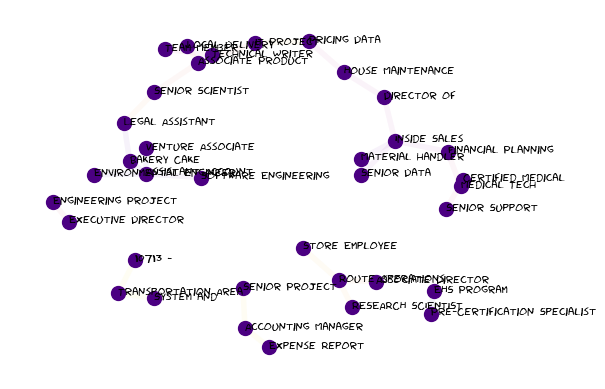

In [59]:
pos = nx.spring_layout(G, k=0.35, seed=6)

# Draw labels with personalized pos
# https://stackoverflow.com/questions/14547388/networkx-in-python-draw-node-attributes-as-labels-outside-the-node

node_sizes = 100
M = G.number_of_edges()
edge_colors = range(2, M + 2)
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=4,
)

def truncate_to_two_words(input_string):
    words = input_string.split()
    truncated_string = ' '.join(words[:2])
    return truncated_string

labels = nx.draw_networkx_labels(G, pos, labels={n: truncate_to_two_words(job_name) for n, job_name in
                                 zip(G, df.iloc[unique_edges_list]['title'])}
                              , font_size=8, font_color='k', font_family='fantasy',
                              font_weight='normal', alpha=None, bbox=None, horizontalalignment='left',
                              verticalalignment='baseline', ax=None, clip_on=False)
# set alpha value for each edge
i = 0
for line in edges.get_paths():
    edges.set_alpha(alpha_values[i])
    i = i+1

ax = plt.gca()
ax.set_axis_off()
plt.show()

## Val / Eval / Train Split

### Training Data

In [60]:
# Select the first 13968 nodes (90%)
selected_nodes = data.x[:13968]

# Find the index of the last occurrence of 13968 in the first row

# data.edge_index[0] == 13968: This creates a boolean mask by comparing each element in the first row of data.edge_index
# with the value 13968. The result is a boolean tensor of the same shape as data.edge_index[0], where True indicates
# that the corresponding element is equal to 13968.

# The nonzero function returns a tensor containing the indices where the condition is True.
# The as_tuple=False argument ensures that the result is a tensor rather than a tuple.

# [-1, 0]: This accesses the last row and the first column of the tensor obtained from the previous step.
# This is done to extract the index of the last occurrence of True in the boolean tensor,
# which corresponds to the last occurrence of 13968 in the first row of data.edge_index.

# .item() extracts the scalar tensor as an Integer
last_index = (data.edge_index[0] == 13968).nonzero()
numpy_array = last_index[0]
last_index = numpy_array[-1]
print(last_index)

# Select columns from the first 0 to the last occurrence of 13968 in the first row
# +1 is because the 0...n conviction, where colums in this context are from 1...n+1
selected_edges = data.edge_index[:, :last_index+1]

# Select the first 13968 labels
selected_labels = data.y[:last_index+1]

# Create a new Data object with the selected data
training_data = Data(x=selected_nodes, edge_index=selected_edges, y=selected_labels)

# Print the selected data
print(training_data)

44058652
Data(x=[13968, 255], edge_index=[2, 44058653], y=[44058653])


In [61]:
# Accessing example values
print("Node features (x):", training_data.x[0][-5:])
print("Edge connections (edge_index):", training_data.edge_index[:, -5:])
print("Edge labels (y):", training_data.y[-5:])
print("\n\n\n")

Node features (x): [0 0 0 0 0]
Edge connections (edge_index): [[13968 13968 13968 13968 13968]
 [15463 15473 15502 15505 15519]]
Edge labels (y): [0.46775 0.25    0.1625  0.21775 0.1625 ]






### Testing Data

In [62]:
last_index = (data.edge_index[0] == 15519).nonzero()
numpy_array = last_index[0]
last_index = numpy_array[-1]
print(last_index)

first_index = (data.edge_index[0] == 13969).nonzero()
numpy_array = first_index[0]
first_index = numpy_array[0]
print(first_index)

selected_edges = data.edge_index[:, first_index:last_index+1]

selected_labels = data.y[first_index:last_index+1]

# Create a new Data object with the selected data
testing_data = Data(x=data.x, edge_index=selected_edges, y=selected_labels)

# Print the selected data
print(testing_data)

48806449
44058653
Data(x=[15520, 255], edge_index=[2, 4747797], y=[4747797])


In [63]:
# Accessing example values
print("Node features (x):", testing_data.x[0][:5])
print("Edge connections (edge_index):", testing_data.edge_index[:, :5])
print("Edge labels (y):", testing_data.y[:5])
print("\n\n\n")
print("Node features (x):", testing_data.x[0][-5:])
print("Edge connections (edge_index):", testing_data.edge_index[:, -5:])
print("Edge labels (y):", testing_data.y[-5:])

Node features (x): [77766802 0 0 0 0]
Edge connections (edge_index): [[13969 13969 13969 13969 13969]
 [    3     4    16    31    34]]
Edge labels (y): [0.325   0.575   0.13    0.05    0.21775]




Node features (x): [0 0 0 0 0]
Edge connections (edge_index): [[15519 15519 15519 15519 15519]
 [15504 15505 15516 15517 15518]]
Edge labels (y): [0.25 0.25 0.05 0.05 0.05]


## Model Creation

In [64]:
from torch_geometric.nn import GCNConv
class Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        # chaining two convolutions with a standard relu activation
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        # cosine similarity
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim = -1)

## Memory Cleaning


In [65]:
del edges
del df
del edges_matrix
del ones_indices
del possible_pairs
del random_sample_pairs
del last_index
del roles_types
del numpy_array
del first_index
del unique_edges_list
del unique_values
del selected_edges
del selected_labels
gc.collect()

9

In [66]:
del G
del ax
del cmap
del edge_colors
del i
del i_indices
del index
del industry_types
del job_types
del labels
del line
del n
del nan_count
del nan_counts
del node_sizes
del pos
del row_index
del row_indexes
del value
gc.collect()

0

In [67]:
import time
# Let the RAM update
time.sleep(30)

## Training Data Manual Batch Split

In [68]:
%%capture
!pip install tqdm

In [69]:
import torch

# Convert NumPy arrays to PyTorch tensors with compatible data types
x_tensor = torch.tensor(training_data.x.astype(np.float32), dtype=torch.float32)
edge_index_tensor = torch.tensor(training_data.edge_index, dtype=torch.long)

# Assign the tensors to the data object
training_data.x = x_tensor
training_data.edge_index = edge_index_tensor

In [70]:
# Convert NumPy arrays to PyTorch tensors with compatible data types
x_tensor = torch.tensor(testing_data.x.astype(np.float32), dtype=torch.float32)
edge_index_tensor = torch.tensor(testing_data.edge_index, dtype=torch.long)

# Assign the tensors to the data object
testing_data.x = x_tensor
testing_data.edge_index = edge_index_tensor

In [71]:
import torch
from torch_geometric.data import Data
from tqdm import tqdm

batch_size = 32
num_samples = 13968
# +batch_size in case of needing x.yyy batches, so it would be x+batch_size batches
num_batches = (num_samples + batch_size) // batch_size
subDatas = []
edge_index = training_data.edge_index

for i in tqdm(range(num_batches), desc='Processing', unit='batch'):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, num_samples)

    # Create a boolean mask for rows where values are within the range [start_idx, end_idx]
    row_mask = (edge_index[0, :] >= start_idx) & (edge_index[0, :] < end_idx) \
            & (edge_index[1, :] >= start_idx) & (edge_index[1, :] < end_idx)

    # Apply the boolean mask to filter rows
    batch_edge_index = edge_index[:, row_mask]
    batch_y = training_data.y[row_mask]

    # Create a new Data object for the batch
    batch_data = Data(x=training_data.x, edge_index=batch_edge_index, y=batch_y)

    # Append the batch Data object to the list
    subDatas.append(batch_data)


Processing: 100%|██████████| 437/437 [04:59<00:00,  1.46batch/s]


In [98]:
print(subDatas)

[Data(x=[13968, 255], edge_index=[2, 214], edge_attr=[214]), Data(x=[13968, 255], edge_index=[2, 344], y=[344]), Data(x=[13968, 255], edge_index=[2, 282], y=[282]), Data(x=[13968, 255], edge_index=[2, 196], y=[196]), Data(x=[13968, 255], edge_index=[2, 186], y=[186]), Data(x=[13968, 255], edge_index=[2, 278], y=[278]), Data(x=[13968, 255], edge_index=[2, 212], y=[212]), Data(x=[13968, 255], edge_index=[2, 240], y=[240]), Data(x=[13968, 255], edge_index=[2, 230], y=[230]), Data(x=[13968, 255], edge_index=[2, 612], y=[612]), Data(x=[13968, 255], edge_index=[2, 316], y=[316]), Data(x=[13968, 255], edge_index=[2, 300], y=[300]), Data(x=[13968, 255], edge_index=[2, 202], y=[202]), Data(x=[13968, 255], edge_index=[2, 206], y=[206]), Data(x=[13968, 255], edge_index=[2, 270], y=[270]), Data(x=[13968, 255], edge_index=[2, 284], y=[284]), Data(x=[13968, 255], edge_index=[2, 350], y=[350]), Data(x=[13968, 255], edge_index=[2, 340], y=[340]), Data(x=[13968, 255], edge_index=[2, 258], y=[258]), Dat

In [99]:
print(subDatas[0].x.shape)

torch.Size([13968, 255])


In [100]:
print(subDatas[0].edge_index.shape)

torch.Size([2, 214])


In [101]:
print(subDatas[1].y)

[0.05    0.25    0.575   0.25    0.25    0.25    0.25    0.25    0.25
 0.575   0.25    0.25    0.25    0.05    0.05    0.1     0.05    0.21775
 0.05    0.05    0.05    0.05    0.05    0.05    0.25    0.05    0.05
 0.3     0.05    0.325   0.25    0.3     0.46775 0.05    0.575   0.46775
 0.25    0.05    0.25    0.3     0.575   0.25    0.1625  0.05    0.05
 0.05    0.05    0.325   0.05    0.21775 0.05    0.21775 0.05    0.3
 0.25    0.25    0.325   0.05    0.325   0.25    0.05    0.21775 0.575
 0.1     0.3     0.05    0.05    0.25    0.3     0.25    0.05    0.25
 0.25    0.25    0.05    0.575   0.3     0.25    0.25    0.05    0.05
 0.325   0.05    0.21775 0.21775 0.325   0.325   0.21775 0.05    0.05
 0.05    0.05    0.05    0.05    0.05    0.05    0.05    0.21775 0.05
 0.43225 0.21775 0.21775 0.21775 0.05    0.21775 0.21775 0.21775 0.325
 0.21775 0.325   0.21775 0.325   0.1625  0.25    0.25    0.25    0.25
 0.25    0.25    0.25    0.25    0.25    0.05    0.25    0.25    0.25
 0.25    0.25

## Training

In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


# Instantiate the model
num_features = 255
hidden_dim = 64
num_classes = 1
model = Net(num_features, hidden_dim, num_classes)

Graph Neural Networks (GNNs) are often trained using a process known as "negative sampling" to improve their ability to distinguish between positive and negative examples, especially in the context of **link prediction** or node classification tasks. Negative sampling is a technique used to address the **class imbalance inherent** in graph-structured data.

<font color='red'>Negative sampling</font> is relevant primarily for tasks involving binary classification, such as predicting whether an edge should exist between two nodes in a graph. The basic idea is to create negative examples (pairs of nodes that do not have an edge) to balance the <font color='green'>positive examples</font> (pairs of nodes that have an edge). This helps prevent the model from becoming biased towards predicting positive examples, especially when the number of negative examples significantly outweighs the number of positive examples in the dataset.

In this scenario, I'll be using <font color='blue'>Random Negative Sampling</font> as it is a straight-forward class imbalance addresser, especial for dealing with tasks involving binary classification.

In [103]:
import torch
import torch.nn as nn
from torch_geometric.utils import negative_sampling
import plotly.graph_objects as go

criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 30
min_loss = float('inf')

# Store loss values for plotting
losses = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    for i in range(len(subDatas)):
        optimizer.zero_grad()
        z = model.encode(subDatas[i].x, subDatas[i].edge_index)
        neg_edge_index = negative_sampling(edge_index=subDatas[i].edge_index, num_nodes=subDatas[i].num_nodes,
                                           num_neg_samples=None, method='sparse')
        edge_label_index = torch.cat([subDatas[i].edge_index, neg_edge_index], dim=-1, )
        edge_label = torch.cat([torch.ones(subDatas[i].edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                               dim=0)
        out = model.decode(z, edge_label_index).view(-1)
        loss = criterion(out, edge_label)
        loss.backward()
        optimizer.step()
        if loss.item() < min_loss:
            min_loss = loss.item()
            torch.save(model.state_dict(), 'best_model.pth')

    # Append current loss to the list
    losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Plotting the loss curve using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, epochs + 1)), y=losses, mode='lines+markers'))
fig.update_layout(title='Loss Over Epochs', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

# Load the best model
model = Net(num_features, hidden_dim, num_classes)
model.load_state_dict(torch.load('best_model.pth'))

Epoch 1/30, Loss: 1.1690190810429275e+23
Epoch 2/30, Loss: 1.2264920379035938e+23
Epoch 3/30, Loss: 9.537319047742684e+23
Epoch 4/30, Loss: 6.84092243769154e+23
Epoch 5/30, Loss: 4.561592659916131e+23
Epoch 6/30, Loss: 1.3610133878372474e+23
Epoch 7/30, Loss: 6.682519669869843e+23
Epoch 8/30, Loss: 2.8199280059581106e+23
Epoch 9/30, Loss: 1.3621415395439037e+23
Epoch 10/30, Loss: 1.246759227018679e+23
Epoch 11/30, Loss: 6.92381389099307e+23
Epoch 12/30, Loss: 5.112913238235662e+23
Epoch 13/30, Loss: 1.266957601131458e+23
Epoch 14/30, Loss: 1.3482609050603925e+23
Epoch 15/30, Loss: 1.6533937409735885e+23
Epoch 16/30, Loss: 1.5800191142606323e+24
Epoch 17/30, Loss: 4.358380156666009e+23
Epoch 18/30, Loss: 3.064209915074135e+23
Epoch 19/30, Loss: 1.2209925122546265e+23
Epoch 20/30, Loss: 1.7181634299505204e+23
Epoch 21/30, Loss: 1.1457659153029031e+23
Epoch 22/30, Loss: 6.061083449671707e+23
Epoch 23/30, Loss: 1.6195057750734913e+23
Epoch 24/30, Loss: 8.651211681763536e+23
Epoch 25/30, Lo

<All keys matched successfully>

In [104]:
def train_gnn_model(gnn_model, data, epochs, plot=False, batched = False, name='trained_model.pth'):
    """
    Trains a Graph Neural Network (GNN) model using the provided data.

    Args:
        gnn_model (torch.nn.Module): The GNN model to be trained.
        data (torch_geometric.data.Data or torch_geometric.data.Batch): The input graph data.
        epochs (int): The number of training epochs.
        plot (bool, optional): If True, a loss curve plot will be displayed using Plotly. Default is False.
        batched (bool, optional): If True, assumes data is a batch of graphs; otherwise, data is a single graph.
                                 Default is False.
        name (str, optional): The name of the file to save the trained model. Default is 'trained_model.pth'.

    Returns:
        None: The function modifies the provided GNN model in-place.

    Example:
        >>> train_gnn_model(my_gnn_model, my_graph_data, epochs=50, plot=True, batched=False)
    """
    criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
    optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)
    min_loss = float('inf')

    # Store loss values for plotting
    losses = []

    if not batched:
        for epoch in range(epochs):
            gnn_model.train()

            # Forward pass
            optimizer.zero_grad()
            z = gnn_model.encode(data.x, data.edge_index)
            neg_edge_index = negative_sampling(edge_index=data.edge_index, num_nodes=data.num_nodes,
                                            num_neg_samples=None, method='sparse')
            edge_label_index = torch.cat([data.edge_index, neg_edge_index], dim=-1, )
            edge_label = torch.cat([torch.ones(data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                                dim=0)
            out = gnn_model.decode(z, edge_label_index).view(-1)
            loss = criterion(out, edge_label)
            loss.backward()
            optimizer.step()
            if loss.item() < min_loss:
                min_loss = loss.item()
                torch.save(gnn_model.state_dict(), name)

            # Append current loss to the list
            losses.append(loss.item())
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

        # Plotting the loss curve using Plotly
        if plot:
            fig = go.Figure()
            fig.add_trace(go.Scatter(x=list(range(1, epochs + 1)), y=losses, mode='lines+markers'))
            fig.update_layout(title='Loss Over Epochs', xaxis_title='Epoch', yaxis_title='Loss')
            fig.show()

    else:
        for epoch in range(epochs):
            gnn_model.train()

            for i in len(data):
                # Forward pass
                optimizer.zero_grad()
                z = gnn_model.encode(data[i].x, data[i].edge_index)
                neg_edge_index = negative_sampling(edge_index=data[i].edge_index, num_nodes=data[i].num_nodes,
                                                num_neg_samples=None, method='sparse')
                edge_label_index = torch.cat([data[i].edge_index, neg_edge_index], dim=-1, )
                edge_label = torch.cat([torch.ones(data[i].edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                                    dim=0)
                out = gnn_model.decode(z, edge_label_index).view(-1)
                loss = criterion(out, edge_label)
                loss.backward()
                optimizer.step()
                if loss.item() < min_loss:
                    min_loss = loss.item()
                    torch.save(gnn_model.state_dict(), name)

                # Append current loss to the list
                losses.append(loss.item())
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

        # Plotting the loss curve using Plotly
        if plot:
            fig = go.Figure()
            fig.add_trace(go.Scatter(x=list(range(1, epochs + 1)), y=losses, mode='lines+markers'))
            fig.update_layout(title='Loss Over Epochs', xaxis_title='Epoch', yaxis_title='Loss')
            fig.show()

## Evaluation

In [105]:
def find_best_threshold(out, edge_label):
  """
  Finds the best threshold for a negative/positive edges classification task.

  This function iterates over a range of thresholds and calculates the error
  for each threshold. The threshold that minimizes the error is then selected
  as the best threshold.

  Parameters:
    - out (torch.Tensor): Model output tensor.
    - edge_label (torch.Tensor): Ground truth edge labels.

  Returns:
  - Tuple (float, float): A tuple containing the best threshold and the corresponding
    error rate.

  Example:
  ```python
  best_threshold, error_rate = find_best_threshold()
  print(f"Best Threshold: {best_threshold}, Error Rate: {error_rate}")
  ```
  """
  threshold = 1
  error = 1
  for i in np.arange(0, 1, 0.05):
    mask = (out > (torch.mean(out))*i).float()
    new_error = torch.sum(mask != edge_label).item() / len(edge_label)
    if new_error < error:
      threshold = i
      error = new_error
  return round(i, 2), error

threshold, error = find_best_threshold(out, edge_label)
print(threshold, error)

0.95 0.21875


In [106]:
testing_data.x = testing_data.x.to(torch.float)
testing_data.edge_index = testing_data.edge_index.to(torch.int64)

In [107]:
print(testing_data.x.shape)
print(testing_data.edge_index)

torch.Size([15520, 255])
tensor([[13969, 13969, 13969,  ..., 15519, 15519, 15519],
        [    3,     4,    16,  ..., 15516, 15517, 15518]])


In [108]:
from sklearn.metrics import roc_auc_score, f1_score
model.eval()
scores = []
z = model.encode(testing_data.x, testing_data.edge_index)
out = model.decode(z, testing_data.edge_index).view(-1)
pred = (out > torch.mean(out)*threshold).float() * 1
score = f1_score(np.ones(testing_data.edge_index.size(1)), pred.cpu().numpy())
scores.append(score)

In [109]:
print(score)

0.6414244478225878


## Predictions

In [110]:
model

Net(
  (conv1): GCNConv(255, 64)
  (conv2): GCNConv(64, 1)
)

In [111]:
def make_a_prediction(gnn_model, max = 1000000, origin=None, destination=None, printing=False):
    """
    Generates predictions of potential edges in a graph using the previously trained GNN model.

    Parameters:
    - gnn_model (Net Class): The model with 'encode' and 'decode' functions to make predictions
    - max (int, optional): Maximum number of predicted edges to generate. Defaults to 1000000.
    - origin (int, optional): If provided, filters the predictions to include only edges originating from this node.
    - destination (int, optional): If provided, filters the predictions to include only edges leading to this node.
    - printing (bool, optional): If True, prints the number of possible edges found in each iteration.

    Returns:
    - numpy.ndarray: Predicted edges in the format of a NumPy array with two columns representing edge indices.

    Note:
    - The function stops predicting edges if the maximum limit (max) is reached.

    Example Usage:
    ```python
    predicted_edges = make_a_prediction(max=1000, origin=3, destination=7, printing=True)
    ```
    """
    pred_edges = []

    for i in range(len(subDatas)):
        z = gnn_model.encode(subDatas[i].x, subDatas[i].edge_index)
        neg_edge_index = negative_sampling(edge_index = subDatas[i].edge_index, num_nodes = None, \
                                           num_neg_samples = None, method = 'sparse')
        out = gnn_model.decode(z, neg_edge_index)
        pred = ((out > torch.mean(out)*threshold).float()).cpu().numpy()
        found = np.argwhere(pred == 1)
        if printing:
          print("Found: {z} possible edges in iteration {j}".format(z=found.size, j=i))
        if found.size > 0:
            edge_tuples = neg_edge_index.t().cpu().numpy()
            select_index = found.reshape(1, found.size)[0]
            edges = edge_tuples[select_index]
            pred_edges += edges.tolist()
            if len(pred_edges) >= max:
                break

    if origin is not None and destination is not None:
      pred_edges = np.array(pred_edges)
      index = np.where((pred_edges[:, 0] == origin) & (pred_edges[:, 1] == destination))
      if index[0].size == 0:
          print("Model predicted no connection between {i}, {j}".format(i=origin, j=destination))
      else:
          print("Found connection between {i}, {j} at {k}".format(i=origin, j=destination, k=index[0]))
      return pred_edges
    else:
      return pred_edges

    return None

In [112]:
pred = make_a_prediction(model, origin=8, destination=2)

Found connection between 8, 2 at [ 79 226]


In [113]:
print(len(pred))

11934


In [114]:
pred[22]

array([ 1, 15])

 # XGBoost

 Now that the GNN model can predict wheter it's most likely that there will be a connection between nodes in the graph, we can now apply a regression non-linear model to predict the weights of such connections.

In [115]:
final_weights_matrix

array([[0.    , 0.    , 0.575 , ..., 0.    , 0.325 , 0.    ],
       [0.    , 0.    , 0.05  , ..., 0.    , 0.    , 0.    ],
       [0.575 , 0.05  , 0.    , ..., 0.    , 0.325 , 0.1625],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.05  , 0.05  ],
       [0.325 , 0.    , 0.325 , ..., 0.05  , 0.    , 0.05  ],
       [0.    , 0.    , 0.1625, ..., 0.05  , 0.05  , 0.    ]])

In [116]:
print(x.shape, final_weights_matrix.shape)

(15520, 255) (15520, 15520)


In [117]:
%%capture
!pip install xgboost

In [118]:
del z
del x_tensor
del selected_nodes
del row_mask
del pred
del out
del data
del edge_index_tensor
del edge_label_index
del edge_label
del edge_index
del neg_edge_index

In [119]:
gc.collect()

186

In [120]:
del batch_edge_index
del batch_data
del loss
gc.collect()

0

## Training

In [121]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, final_weights_matrix, test_size=0.2, random_state=42)

# Convert the data into DMatrix format, which is the internal data structure used by XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 2,  # Maximum depth of a tree.
    'learning_rate': 0.1,
    'n_estimators': 50 # Number of trees
}

model2 = xgb.train(params, dtrain)
model2.save_model('xgboost_model.model')
model2 = xgb.Booster()
model2.load_model('xgboost_model.model')

loaded_predictions = model2.predict(dtest)
mse = mean_squared_error(y_test, loaded_predictions)
print(f'Mean Squared Error on Test Set: {mse}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[22:06:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[22:22:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



Mean Squared Error on Test Set: 0.0032462471250156166


In [122]:
x_test

array([[1766026, 0, 1, ..., 0, 386, 22],
       [2723, 0, 5, ..., 0, 110, 34],
       [164401, 1, 36, ..., 0, 67, 24],
       ...,
       [34208, 0, 0, ..., 0, 255, 20],
       [14133, 0, 2, ..., 0, 1744, 15],
       [71350, 1, 0, ..., 0, 13, 9]], dtype=object)

## Prediction

In [138]:
def make_weight_prediction(xgboost_model ,job, final_weights_matrix, printing = False):
  """
  Make weight predictions using an XGBoost model.

  Parameters:
  - xgboost_model (xgb.Booster): The trained XGBoost model used for predictions.
  - job (xgb.DMatrix or array-like): The input data for which weight predictions are to be made.
      If not already an xgb.DMatrix, it will be converted to one.
  - printing (bool, optional): If True, print additional information about the predictions.
      Default is False.

  Returns:
  - predictions (numpy.ndarray): The predicted output, representing the correlation
    of the new data for all existing nodes.

  Example:
  >>> model = xgb.Booster()  # Replace with your trained XGBoost model
  >>> input_data = np.array([[...]])  # Replace with your input data
  >>> predictions = make_weight_prediction(model, input_data, printing=True)
  """
  if not isinstance(job, xgb.DMatrix):
    job = xgb.DMatrix(job)
  predictions = xgboost_model.predict(job)
  if printing:
    print("Predicted output (Correlation of the new data for all existing nodes):", predictions, predictions.shape)
    print("Difference mean: ", np.mean(predictions - final_weights_matrix[51]))
  return predictions

# Input array must have a shape of (1, 255)
predictions = make_weight_prediction(model2, np.array(x[51])[np.newaxis, :], True)

# Final Combined Model

Now that we have bot GNN that predicts all the possible edges between nodes inside the graph, and we also the XGBoost model that predicts edges weights, we can now create the ending point of our model that will be used for making either whole graph edges and edges weights predictions, or, to make an specific prediction of the edge and weight between node A and B.

In [139]:
edge_index = testing_data.edge_index
start_idx = 15300
end_idx = 15519

# Create a boolean mask for rows where values are within the range [start_idx, end_idx]
row_mask = (edge_index[0, :] >= start_idx) & (edge_index[0, :] < end_idx) \
        & (edge_index[1, :] >= start_idx) & (edge_index[1, :] < end_idx)

# Apply the boolean mask to filter rows
batch_edge_index = edge_index[:, row_mask]
batch_y = testing_data.y[row_mask]

# Create a new Data object for sampling
sample_data = Data(x=testing_data.x, edge_index=batch_edge_index, y=batch_y)
testing_data

Data(x=[15520, 255], edge_index=[2, 4747797], y=[4747797])

In [140]:
sample_data

Data(x=[15520, 255], edge_index=[2, 9692], y=[9692])

Saving this data for Unit Testing

In [ ]:
import pickle
with open('unit_testing_graph_data', 'wb') as f:
    pickle.dump(sample_data, f)

In [ ]:
with open('unit_testing_graph_data', 'rb') as f:
    loaded_data = pickle.load(f)

In [ ]:
loaded_data

In [141]:
def predict_edges_and_weights(threshold, xgboost_model, gnn_model, data, printing=False, origin=None, destination=None):
  """
  Predicts potential edges and their weights using a combination of graph neural network (GNN) and XGBoost models.

  Parameters:
  - threshold (float): The threshold value to determine the presence of an edge based on the GNN predictions.
  - xgboost_model: The pre-trained XGBoost model for edge weight prediction.
  - gnn_model: The pre-trained GNN model for edge presence prediction.
  - data: The input graph data containing features (data.x), edge indices (data.edge_index), and other information.
  - printing (bool, optional): If True, print additional information during execution. Default is False.
  - origin (int, optional): If provided, checks for predicted edges originating from this node.
  - destination (int, optional): If provided, checks for predicted edges leading to this node.

  Returns:
  - pred_edges (list): List of predicted edges in the format [(node1, node2), ...].
  - pred_weights (list): List of predicted weights corresponding to each edge in pred_edges.

  If origin and destination are provided:
  - If a connection is found between the specified nodes, returns (pred_edges, pred_weights).
  - If no connection is found, prints a message and returns None.

  If origin and destination are not provided:
  - Returns (pred_edges, pred_weights).

  If no predicted edges are found, returns None.
  """
  pred_edges = []
  pred_weights = []
  z = gnn_model.encode(data.x, data.edge_index)
  neg_edge_index = negative_sampling(edge_index=data.edge_index, num_nodes=data.num_nodes,
                                      num_neg_samples=None, method='sparse')
  edge_label_index = torch.cat([data.edge_index, neg_edge_index], dim=-1, )
  edge_label = torch.cat([torch.ones(data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                          dim=0)
  out = gnn_model.decode(z, edge_label_index).view(-1)
  pred = ((out > torch.mean(out)*threshold).float()).cpu().numpy()
  if printing:
    edge_label = torch.cat([torch.ones(data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                           dim=0)
    print("Error = {z}".format(z=\
    torch.sum((out > torch.mean(out)*threshold).float() != edge_label).item() / len(edge_label)))
  found = np.argwhere(pred == 1)
  if printing:
    print("Found: {z} possible edges".format(z=found.size))
  if found.size > 0:
      edge_tuples = edge_label_index.t().cpu().numpy()
      select_index = found.reshape(1, found.size)[0]
      pred_edges += edge_tuples[select_index].tolist()

  for count, _ in enumerate(tqdm(pred_edges, desc="Processing Edges", unit="edge")):
    weights_matrix = make_weight_prediction(xgboost_model, np.array(data.x[pred_edges[count][0]])[np.newaxis, :],\
                                            printing)
    edge_weight = list(weights_matrix)[0][pred_edges[count][1]]
    pred_weights.append(edge_weight)

  if origin is not None and destination is not None:
    pred_edges = np.array(pred_edges)
    index = np.where((pred_edges[:, :] == origin) & (pred_edges[:, :] == destination))
    if index[0].size == 0:
        print("Model predicted no connection between {i}, {j}".format(i=origin, j=destination))
    else:
        print("Found connection between {i}, {j} at {k}".format(i=origin, j=destination, k=index[0]))
    return pred_edges, pred_weights
  else:
    return pred_edges, pred_weights

  return None

In [142]:
predictions2 = predict_edges_and_weights(threshold, model2, model, sample_data, printing=True, origin=15450, destination=15511)

Error = 0.43288278992983903
Found: 3359 possible edges


Processing Edges: 100%|██████████| 3359/3359 [01:01<00:00, 54.28edge/s]

Model predicted no connection between 15450, 15511


In [143]:
print(type(predictions2), predictions2[0].shape, len(predictions2[1]))

<class 'tuple'> (3359, 2) 3359


In [144]:
def predictions_to_df(predictions):
  results = np.array(predictions[0])
  results = np.hstack((results,  np.array(predictions[1]).reshape(len(predictions[1]),1)))
  results = pd.DataFrame(results, columns=['Origin', 'Destination', 'Weight'])
  results['Weight %'] = round(results['Weight'] * 100,2)
  results.iloc[:,0] = results.iloc[:,0].astype(int)
  results.iloc[:,1] = results.iloc[:,1].astype(int)
  return results

results = predictions_to_df(predictions2)

<ipython-input-144-708f734653bd>:6: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-144-708f734653bd>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [145]:
results

,Origin,Destination,Weight,Weight %
0,15300,15363,0.358127,35.81
1,15300,15423,0.114646,11.46
2,15300,15477,0.091124,9.11
3,15300,15478,0.091124,9.11
4,15300,15493,0.089126,8.91
...,...,...,...,...
3354,13689,4289,0.046212,4.62
3355,4904,1176,0.020549,2.05
3356,7973,2687,0.019475,1.95
3357,783,8401,0.025525,2.55


## Merging Results

Now I merge the new edges and edge_weights with the original 'sample_data'

In [149]:
new_edges = torch.tensor([results['Origin'].values, results['Destination'].values])
new_edges.shape

<ipython-input-149-0ca8e45de21e>:1: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)



torch.Size([2, 3359])

In [151]:
sample_data.edge_index = torch.cat((sample_data.edge_index , new_edges), dim=1)
sample_data.edge_index.shape

torch.Size([2, 13051])

In [160]:
sample_data.y = torch.cat((torch.from_numpy(sample_data.y), torch.tensor(results['Weight'].values)), dim=0)
sample_data.y.shape

torch.Size([13051])

In [161]:
sample_data

Data(x=[15520, 255], edge_index=[2, 13051], y=[13051])

# Unit Testing

This Test Suite runs with python3 from the 'src' folder located in the [Official Github Repository of this Project](https://github.com/papitaAlgodonCplusplus/Linkedin-Graph-Neural-Networks-Project), instructions of how to run this Unit Test Suite can be found inside the **'README'** file, **'Running test suite'** section.

In [ ]:
%%writefile test_suite

import unittest
import gc
import numpy as np
import pandas as pd
import pickle
import xgboost as xgb
import torch
import networkx as nx
import torch.nn.functional as F
import torch_geometric.transforms as T
import torch.nn as nn
from torch_geometric.utils import negative_sampling
from tqdm import tqdm
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

from functions.net_class import Net
from functions.model_trainer import train_gnn_model, find_best_threshold, make_weight_prediction, train_xgboost_model

class ModelTesting(unittest.TestCase):
    def setUp(self):
        print("\nSetting up resources for the test")
        self.num_features = 255
        self.hidden_dim = 64
        self.num_classes = 1

    def test_encoding(self):
        gnn_model = Net(self.num_features, self.hidden_dim, self.num_classes)
        gnn_model.load_state_dict(torch.load('models/best_model.pth'))
        with open('test_data/unit_testing_graph_data', 'rb') as f:
            loaded_data = pickle.load(f)
            result = gnn_model.encode(loaded_data.x, loaded_data.edge_index)
        # Ensure that encoding's output shape is [NUM_NODES, NUM_CLASSES = 1]
        self.assertEqual(result.shape, torch.Size([len(loaded_data.x), self.num_classes]))

    def test_decoding(self):
        gnn_model = Net(self.num_features, self.hidden_dim, self.num_classes)
        gnn_model.load_state_dict(torch.load('models/best_model.pth'))
        with open('test_data/unit_testing_graph_data', 'rb') as f:
            loaded_data = pickle.load(f)
            z = gnn_model.encode(loaded_data.x, loaded_data.edge_index)
            neg_edge_index = negative_sampling(edge_index=loaded_data.edge_index, num_nodes=loaded_data.num_nodes,
                                           num_neg_samples=None, method='sparse')
            edge_label_index = torch.cat([loaded_data.edge_index, neg_edge_index], dim=-1, )
            edge_label = torch.cat([torch.ones(loaded_data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                                dim=0)
            # Ensure that edge_label has shape of RNS's shape + NUM_EDGES
            self.assertEqual(edge_label.shape[0], loaded_data.edge_index.shape[1] * 2)

            result = gnn_model.decode(z, edge_label_index).view(-1)

            # Ensure that predictions and labels are compatible
            self.assertEqual(result.shape[0], edge_label.shape[0])

    def test_RNS(self):
        with open('test_data/unit_testing_graph_data', 'rb') as f:
            loaded_data = pickle.load(f)
            neg_edge_index = negative_sampling(edge_index=loaded_data.edge_index, num_nodes=loaded_data.num_nodes,
                                            num_neg_samples=None, method='sparse')
            # Ensure that random negative sampling returned torch of shape [(Origin, Destination), NUM_EDGES]
            self.assertEqual(neg_edge_index.shape, torch.Size([2, loaded_data.edge_index.shape[1]]))
            # Ensure that no random negative sampled edge is a positive one
            self.assertEqual(((neg_edge_index[0] == loaded_data.edge_index[0]) & (neg_edge_index[1] == loaded_data.edge_index[1]))\
                             .nonzero().sum().item(), 0)

    def test_random_input_handling(self):
        gnn_model = Net(5, self.hidden_dim, self.num_classes)
        # 10 nodes, 30% probability of edge between each pair of nodes
        graph = nx.erdos_renyi_graph(10, p=0.3)
        edge_index = torch.tensor(list(graph.edges)).t().contiguous()
        # 10 nodes, 5 features
        x = torch.randn(10, 5)
        random_data = Data(x=x, edge_index=edge_index)
        train_gnn_model(gnn_model, random_data, 5)

        z = gnn_model.encode(random_data.x, random_data.edge_index)
        self.assertIsNotNone(z)
        self.assertFalse(torch.isnan(z).any())

        neg_edge_index = negative_sampling(edge_index = random_data.edge_index, num_nodes = None, \
                                           num_neg_samples = None, method = 'sparse')

        out = gnn_model.decode(z, neg_edge_index)
        self.assertIsNotNone(out)
        self.assertFalse(torch.isnan(out).any())

    def test_gnn_model_accuracy(self):
        gnn_model = Net(self.num_features, self.hidden_dim, self.num_classes)
        gnn_model.load_state_dict(torch.load('models/best_model.pth'))
        with open('test_data/unit_testing_graph_data', 'rb') as f:
            loaded_data = pickle.load(f)
            z = gnn_model.encode(loaded_data.x, loaded_data.edge_index)
            neg_edge_index = negative_sampling(edge_index=loaded_data.edge_index, num_nodes=loaded_data.num_nodes,
                                           num_neg_samples=None, method='sparse')
            edge_label_index = torch.cat([loaded_data.edge_index, neg_edge_index], dim=-1, )
            edge_label = torch.cat([torch.ones(loaded_data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                                dim=0)
            result = gnn_model.decode(z, edge_label_index).view(-1)
            threshold, error = find_best_threshold(result, edge_label)

            # Ensure at least 70% accuracy on binary edge predictions
            self.assertLessEqual(error, 0.3)

    def test_xgboost_accuracy(self):
        # 50 nodes, 30 features
        x = np.random.rand(50, 30)

        # Set the first column to be the row indices
        x[:, 0] = np.arange(50)

        # Convert values in the second to the last columns to 0 or 1
        x[:, 1:] = np.random.choice([0, 1], size=(50, 29))

        # Generate random weights matrix
        original_weights_matrix = np.random.rand(50, 30)

        train_xgboost_model(x, original_weights_matrix)
        xgboost_model = xgb.Booster()
        xgboost_model.load_model('models/xgboost_model_unit_testing.json')
        resulting_weights, mean_error = make_weight_prediction(0, original_weights_matrix, xgboost_model, \
                                                                np.array([original_weights_matrix[0]]), False, True)

        # Ensure at least 95% accuracy on edges weights predictions
        self.assertGreaterEqual(1-mean_error, 0.95)

    def tearDown(self):
        print("\nCleaning up resources after the test")
        del self.num_features
        del self.num_classes
        del self.hidden_dim
        gc.collect()

def layer_test():
    suite = unittest.TestSuite()
    suite.addTest(ModelTesting('test_encoding'))
    suite.addTest(ModelTesting('test_RNS'))
    suite.addTest(ModelTesting('test_decoding'))
    return suite

def compatibility_test():
    suite = unittest.TestSuite()
    suite.addTest('test_random_input_handling')
    return suite

def accuracy_test():
    suite = unittest.TestSuite()
    suite.addTest('test_gnn_model_accuracy')
    suite.addTest('test_xgboost_accuracy')
    return suite

if __name__ == '__main__':
    test_loader = unittest.TestLoader()
    test_suite = test_loader.discover('.')

    runner = unittest.TextTestRunner()
    runner.run(test_suite)

# GNNLens2

In [74]:
%%capture
!pip install Flask==2.0.3
!pip install gnnlens
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.3 MB/s eta 0:00:00


In [194]:
print(dgl.__version__)

1.1.3


## Data Generation

In [184]:
edge_index = testing_data.edge_index
start_idx = 14000
end_idx = 15000

# Create a boolean mask for rows where values are within the range [start_idx, end_idx]
row_mask = (edge_index[0, :] >= start_idx) & (edge_index[0, :] < end_idx) \
        & (edge_index[1, :] >= start_idx) & (edge_index[1, :] < end_idx)

# Apply the boolean mask to filter rows
batch_edge_index = edge_index[:, row_mask]
batch_y = testing_data.y[row_mask]
batch_x = testing_data.x[start_idx:end_idx, :]

# Create a new Data object for sampling
sample_gnnlens2_data = Data(x=batch_x, edge_index=batch_edge_index, y=batch_y)

# Nodes of this Data have index 0 to 1000
sample_gnnlens2_data.edge_index = sample_gnnlens2_data.edge_index - start_idx

sample_gnnlens2_data

Data(x=[1000, 255], edge_index=[2, 203162], y=[203162])

In [185]:
import pickle
with open('sample_gnnlens2_data', 'wb') as f:
    pickle.dump(sample_gnnlens2_data, f)

In [177]:
predictions = predict_edges_and_weights(threshold, model2, model, sample_gnnlens2_data, printing=True)

Error = 0.3734532048316122
Found: 184457 possible edges


Processing Edges: 100%|██████████| 184457/184457 [56:16<00:00, 54.63edge/s]


In [178]:
results = predictions_to_df(predictions)

<ipython-input-144-708f734653bd>:6: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-144-708f734653bd>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [191]:
results

,Origin,Destination,Weight,Weight %
0,0,9,0.161251,16.13
1,0,21,0.017914,1.79
2,0,25,0.018374,1.84
3,0,30,0.030733,3.07
4,0,32,0.014961,1.50
...,...,...,...,...
184452,712,0,0.016951,1.70
184453,820,842,0.051665,5.17
184454,888,826,0.186919,18.69
184455,790,485,0.028488,2.85


In [180]:
new_edges = torch.tensor([results['Origin'].values, results['Destination'].values])
new_edges.shape

torch.Size([2, 184457])

In [181]:
sample_gnnlens2_data.edge_index = torch.cat((sample_gnnlens2_data.edge_index , new_edges), dim=1)
sample_gnnlens2_data.edge_index.shape

torch.Size([2, 387619])

In [182]:
sample_gnnlens2_data.y = torch.cat((torch.from_numpy(sample_gnnlens2_data.y), torch.tensor(results['Weight'].values)), dim=0)
sample_gnnlens2_data.y.shape

torch.Size([387619])

In [183]:
import pickle
with open('predicted_new_data', 'wb') as f:
    pickle.dump(sample_gnnlens2_data, f)

## Script

In [163]:
%%writefile gnnlens2_main_app.py
import gnnlens
import torch
import pickle
import shutil
import os
from torch_geometric.data import Data
from dgl import DGLGraph
from gnnlens import Writer
import numpy as numpy

# Data(x=[15520, 255], edge_index=[2, 9692], y=[9692])
with open('test_data/sample_gnnlens2_data', 'rb') as f:
    original_data = pickle.load(f)
original_data.edge_attr = torch.from_numpy(original_data.y)
original_data.y = None

# Data(x=[15520, 255], edge_index=[2, 13051], y=[13051])
with open('test_data/predicted_new_data', 'rb') as f:
    predicted_new_data = pickle.load(f)
predicted_new_data.edge_attr = predicted_new_data.y
predicted_new_data.y = None

# Function to convert torch_geometric Data to DGLGraph
def torch_geometric_to_dgl(data):
    dgl_graph = DGLGraph()
    dgl_graph.add_nodes(data.num_nodes)
    dgl_graph.add_edges(data.edge_index[0], data.edge_index[1])

    # Copy node features
    dgl_graph.ndata['x'] = data.x

    # Copy edge features if available
    if 'edge_attr' in data:
        dgl_graph.edata['edge_attr'] = data.edge_attr

    return dgl_graph

original_graph = torch_geometric_to_dgl(original_data)
predicted_graph = torch_geometric_to_dgl(predicted_new_data)

if os.path.exists("sample_gnnlens2_app"):
    try:
        shutil.rmtree("sample_gnnlens2_app")
    except Exception as e:
        print(f"Error: Unable to delete the folder 'sample_gnnlens2_app'.")
        print(e)

# Specify the path to create a new directory for dumping data files.
writer = Writer('sample_gnnlens2_app')
writer.add_graph(name='Sample DGLGraph Data', graph=original_graph, eweights={"edge_weights": \
                                                                         original_data.edge_attr.view(len(original_data.edge_attr))})
writer.add_graph(name='Predicted DGLGraph Data', graph=predicted_graph, eweights={"edge_weights": \
                                                                         predicted_new_data.edge_attr.view(len(predicted_new_data.edge_attr))})
# Finish dumping
writer.close()

Writing gnnlens2_main_app.py


By entering localhost:7777 in your web browser address bar, you can see the GNNLens2 interface like below. 7777 is the default port GNNLens2 uses. You can specify an alternative one by adding --port xxxx after the command line and change the address in the web browser accordingly.

In [165]:
!python gnnlens2_main_app.py
!gnnlens --logdir sample_gnnlens2_app

Traceback (most recent call last):
  File "/content/gnnlens2_main_app.py", line 12, in <module>
    with open('test_data/unit_testing_graph_data', 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'test_data/unit_testing_graph_data'
Traceback (most recent call last):
  File "/usr/local/bin/gnnlens", line 5, in <module>
    from gnnlens.server import start_server
  File "/usr/local/lib/python3.10/dist-packages/gnnlens/server.py", line 30, in <module>
    from flask import Flask
  File "/usr/local/lib/python3.10/dist-packages/flask/__init__.py", line 7, in <module>
    from .app import Flask as Flask
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 28, in <module>
    from . import cli
  File "/usr/local/lib/python3.10/dist-packages/flask/cli.py", line 18, in <module>
    from .helpers import get_debug_flag
  File "/usr/local/lib/python3.10/dist-packages/flask/helpers.py", line 16, in <module>
    from werkzeug.urls import url_quote
ImportError: canno